# Support Vector Machine Based Diabetes Prediction

## 1. Importing of the dependencies and libraries required

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the encoder libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#importing the feature selection libraries
import statsmodels.api as sm

#importing the sklearn support vector machine model
from sklearn import svm

#importing sklearn train test split library
from sklearn.model_selection import train_test_split

#import the performace evaluation matrices
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## 2. Retrieval of the data

In [2]:
#Loading of the data in dataset into a datafram using panda
preg_diab_df=pd.read_csv("diabetes.csv")

## 3. Preprocessing of the data

In [3]:
#viewing the first five rows in the created dataframe
preg_diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#viewing the no of rows and no of columns available
preg_diab_df.shape

(768, 9)

In [5]:
#checking for avaialability of null values within the columns
preg_diab_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#checking for the avaialbility of any duplicates
preg_diab_df.duplicated().any()

False

In [7]:
#checking whether the numerical values are interger or float values
preg_diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Evaluating for the statistical information on the data
preg_diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#Determining the value of target variable count avaialble for each class/label
preg_diab_df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
# Label Reference
# 0 label referes to the non-diabetic prediction
# 1 label refers to the diabetic prediction

## 4. Normalization of the data through mean normalization in each column

In [11]:
#checking the mean value in each cloumn
preg_diab_df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [15]:
#obtaining the mean value grouped by the outcome labels
preg_diab_df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [17]:
#Obtain all the data without the prediction cloumn
preg_diab_df_X= preg_diab_df.drop(columns="Outcome",axis=1)
y=preg_diab_df["Outcome"]

In [18]:
svm_model = sm.Logit(y,preg_diab_df_X)
res = svm_model.fit()
print(res.summary2())

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.059     
Dependent Variable:    Outcome            AIC:                950.6528  
Date:                  2023-04-25 18:49   BIC:                987.8031  
No. Observations:      768                Log-Likelihood:     -467.33   
Df Model:              7                  LL-Null:            -496.74   
Df Residuals:          760                LLR p-value:        2.5825e-10
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1284   0.0286  4.4843 0

In [19]:
#Dropping the columns with p values greater 0.05

preg_diab_df_X = preg_diab_df_X.drop(["DiabetesPedigreeFunction"], axis=1)

In [20]:
print(preg_diab_df_X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
0              6      148             72             35        0  33.6   50
1              1       85             66             29        0  26.6   31
2              8      183             64              0        0  23.3   32
3              1       89             66             23       94  28.1   21
4              0      137             40             35      168  43.1   33
..           ...      ...            ...            ...      ...   ...  ...
763           10      101             76             48      180  32.9   63
764            2      122             70             27        0  36.8   27
765            5      121             72             23      112  26.2   30
766            1      126             60              0        0  30.1   47
767            1       93             70             31        0  30.4   23

[768 rows x 7 columns]


In [21]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [22]:
d = preprocessing.normalize(preg_diab_df_X)
preg_diab_normalized_df = pd.DataFrame(d, columns=preg_diab_df_X.columns)
print(preg_diab_normalized_df)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.033553  0.827630       0.402631       0.195723  0.000000  0.187894   
1       0.008424  0.716043       0.555987       0.244297  0.000000  0.224079   
2       0.040398  0.924102       0.323183       0.000000  0.000000  0.117659   
3       0.006612  0.588468       0.436392       0.152076  0.621528  0.185797   
4       0.000000  0.596416       0.174136       0.152369  0.731371  0.187632   
..           ...       ...            ...            ...       ...       ...   
763     0.042321  0.427443       0.321640       0.203141  0.761780  0.139236   
764     0.013304  0.811528       0.465631       0.179600  0.000000  0.244789   
765     0.026915  0.651353       0.387582       0.123811  0.602905  0.141037   
766     0.006653  0.838288       0.399185       0.000000  0.000000  0.200258   
767     0.007915  0.736054       0.554019       0.245351  0.000000  0.240603   

          Age  
0    0.279605  
1    0.

## 5. Standardization of data

In [23]:
std_scaler=StandardScaler()

In [24]:
std_scaler.fit(preg_diab_df_X)

StandardScaler()

In [25]:
std_data = std_scaler.transform(preg_diab_df_X)

In [26]:
print(std_data)

[[ 0.63994726  0.84832379  0.14964075 ... -0.69289057  0.20401277
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.69289057 -0.68442195
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -0.69289057 -1.10325546
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ...  0.27959377 -0.73518964
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.69289057 -0.24020459
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.69289057 -0.20212881
  -0.87137393]]


In [27]:
X=std_data
y=preg_diab_df["Outcome"]

In [28]:
print(X)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ... -0.69289057  0.20401277
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.69289057 -0.68442195
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -0.69289057 -1.10325546
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ...  0.27959377 -0.73518964
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.69289057 -0.24020459
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.69289057 -0.20212881
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## 6. Split the dataset for testing and training

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=2)

In [30]:
print(X.shape,X_train.shape,X_test.shape) 

(768, 7) (614, 7) (154, 7)


## 7. Train the classifier_model using the Support Vector Machine Algorithm

In [31]:
classifier_model=svm.SVC(kernel='linear')

In [32]:
classifier_model.fit(X_train,y_train)

SVC(kernel='linear')

## 8. Evaluate the classifier_model

In [33]:
# training set accuracy

X_train_prediction=classifier_model.predict(X_train)
training_data_accuracy=accuracy_score(y_train,X_train_prediction)
training_accuracy_percentage = round((training_data_accuracy * 100),2)
print(f"Taining dataset Accuracy Score : {training_accuracy_percentage} %")

Taining dataset Accuracy Score : 77.36 %


In [34]:
# testing set accuracy

X_test_prediction=classifier_model.predict(X_test)
testing_data_accuracy=accuracy_score(y_test,X_test_prediction)
testing_accuracy_percentage = round((testing_data_accuracy * 100),2)
print(f"Testing dataset Accuracy Score : {testing_accuracy_percentage} %")

Testing dataset Accuracy Score : 75.32 %


In [35]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



## 9. Plot the classifier graph

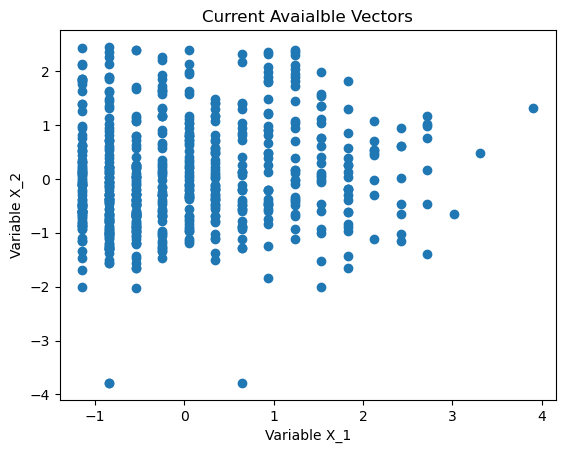

In [36]:
#plotting the data avaialable initially
X_axis_data_column_zero= X_train[:,0]
X_axis_data_column_one = X_train[:,1]

plt.scatter(X_axis_data_column_zero, X_axis_data_column_one)
plt.title('Current Avaialble Vectors')
plt.xlabel('Variable X_1')
plt.ylabel('Variable X_2')
plt.show()

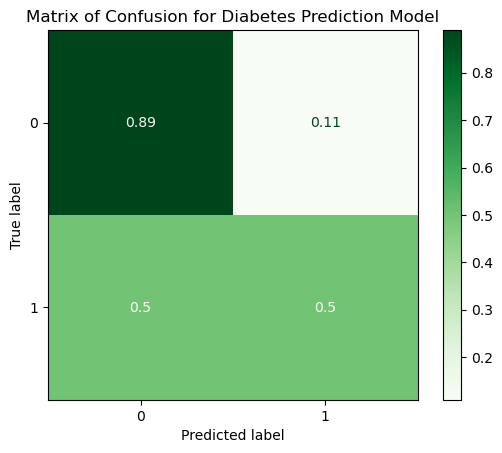

In [37]:
# Plotting of the matrix containing the confusion
X_test_set =X_test
Y_test_set =y_test

matrix = plot_confusion_matrix(classifier_model, X_test_set, Y_test_set,
                                 cmap=plt.cm.Greens,
                                 normalize='true')
plt.title('Matrix of Confusion for Diabetes Prediction Model')
plt.show(matrix)
plt.show()

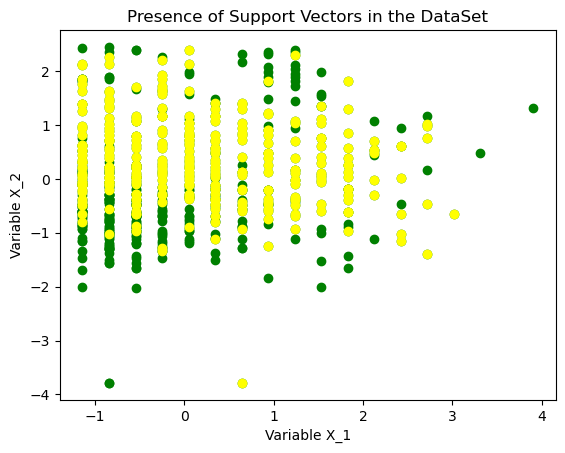

In [38]:
# Identification of possible support vectors
available_svs = classifier_model.support_vectors_

# Visualizing the support vectors identified
X_axis_data_column_zero= X_train[:,0]
X_axis_data_column_one = X_train[:,1]
plt.scatter(X_axis_data_column_zero, X_axis_data_column_one, color="green")

support_vectors_data_column_zero = available_svs[:,0]
support_vectors_column_one = available_svs[:,1]
plt.scatter(support_vectors_data_column_zero,support_vectors_column_one, color='yellow')


plt.title('Presence of Support Vectors in the DataSet')
plt.xlabel('Variable X_1')
plt.ylabel('Variable X_2')
plt.show()

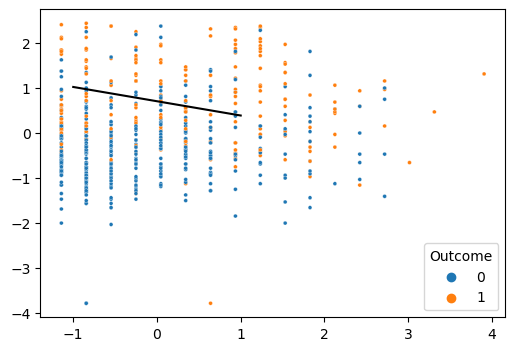

In [39]:
import seaborn as sns

plt.figure(figsize=(6, 4))

# Visualizing of the 2-D vector space
sns.scatterplot(x=X_axis_data_column_zero, 
                y=X_axis_data_column_one, 
                hue=y_train, 
                s=8);

# Generation of the hyperplane for the data
w = classifier_model.coef_[0]         
b = classifier_model.intercept_[0]      
x_data_points = np.linspace(-1, 1)    
y_data_points = -(w[0] / w[1]) * x_data_points - b / w[1] 

# Plot the hyperplane in black color
plt.plot(x_data_points, y_data_points, color='black');
